# <p style="text-align: center;">Predição do preço de venda de carro: Regressão Linear</p>

## Contexo

Este Dataset contém os preços e outros atributos de carros.

**Car_Name**: Nome do modelo do carro.

**Selling_Price**: Preço que o dono do carro quer vende-lô.

**Present_Price**: Preço do carro no momento do seu lançamento.

**Kms_Driven**: Distância percorrida pelo carro em kilometros. 

**Fuel_Type**: Tipo de combustível do carro.

**Seller_Type**: Se o tipo de venda é feita por revendedor ou diretamente pelo dono.

**Transmission**: Tipo de transmissão do carro.

**Owner**: Quantidade de donos anteriores do carro.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('car data.csv')
df.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
177,Honda Activa 125,2016,0.35,0.57,24000,Petrol,Individual,Automatic,0
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
149,Bajaj Pulsar 220 F,2016,0.51,0.94,24000,Petrol,Individual,Manual,0
209,grand i10,2015,4.85,5.70,21125,Diesel,Dealer,Manual,0
286,jazz,2016,5.65,7.90,28569,Petrol,Dealer,Manual,0
103,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0
46,ritz,2013,2.65,4.89,64532,Petrol,Dealer,Manual,0
106,Hyosung GT250R,2014,1.35,3.45,16500,Petrol,Individual,Manual,1
57,corolla altis,2010,4.75,18.54,50000,Petrol,Dealer,Manual,0
225,i10,2011,2.70,4.60,22517,Petrol,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Renomear a coluna 'Present_Price' para 'Launch_Price', facilitando o entendimento da coluna.

In [6]:
df = df.rename(columns = {'Present_Price': 'Launch_Price'})
df.head()

,Car_Name,Year,Selling_Price,Launch_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Transformando o 'Year' em 'Age_Car'

In [7]:
df['Car_Age'] = 2022 - df['Year']

In [8]:
df.drop('Year', axis = 1, inplace = True)

In [9]:
df.head()

,Car_Name,Selling_Price,Launch_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


### Para fins analíticos o nome do carro não faz diferença, portanto será removido do dataset

In [10]:
df.drop('Car_Name', axis = 1, inplace = True)

In [11]:
df.head()

,Selling_Price,Launch_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


### Observando os dados quantitativos

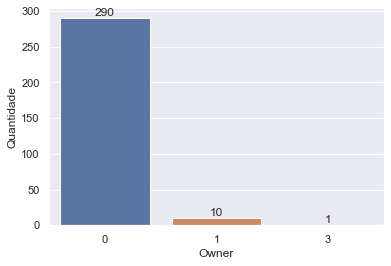

In [12]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Owner", data=df)
ax.bar_label(ax.containers[0])
ax.set(ylabel='Quantidade')
plt.show()

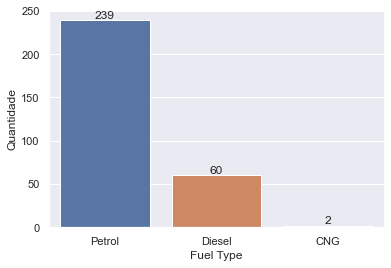

In [13]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Fuel_Type", data=df)
ax.bar_label(ax.containers[0])
ax.set(xlabel='Fuel Type', ylabel='Quantidade')
plt.show()

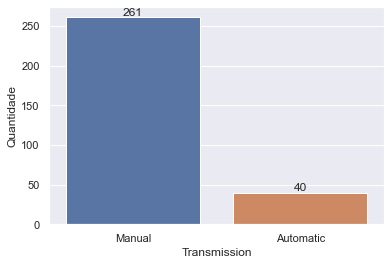

In [14]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Transmission", data=df)
ax.bar_label(ax.containers[0])
ax.set(ylabel='Quantidade')
plt.show()

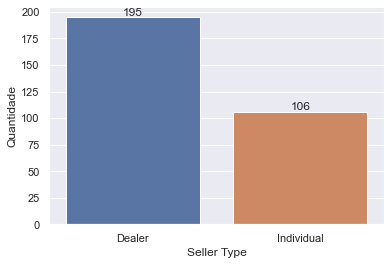

In [15]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Seller_Type", data=df)
ax.bar_label(ax.containers[0])
ax.set(xlabel='Seller Type', ylabel='Quantidade')
plt.show()

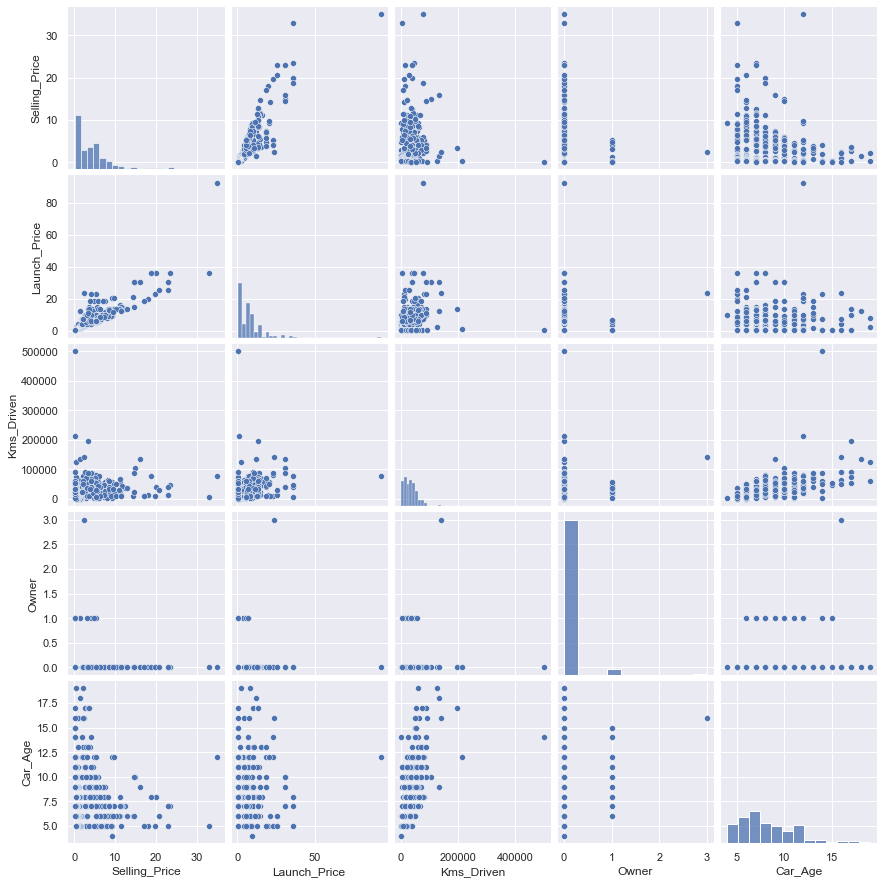

In [16]:
sns.pairplot(df, palette = 'turbo')

In [17]:
df.corr()

,Selling_Price,Launch_Price,Kms_Driven,Owner,Car_Age
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Launch_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000


<AxesSubplot:>

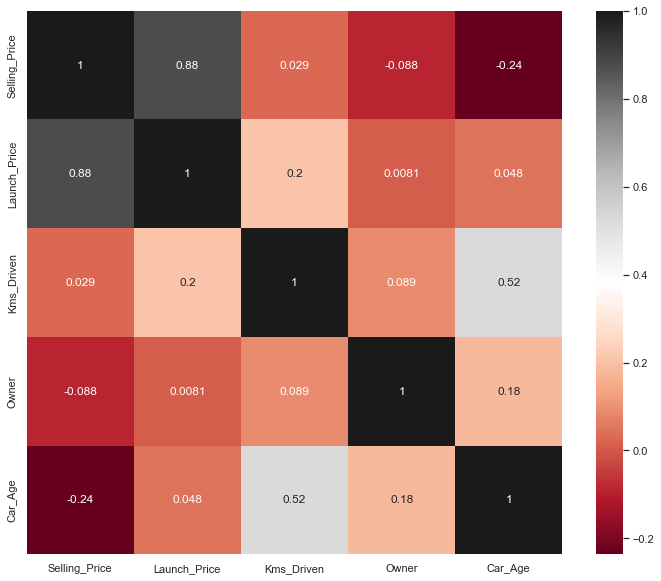

In [18]:
figure, ax = plt.subplots(figsize=(12,10))

sns.heatmap(df.corr(), annot = True, cmap="RdGy")

### É observado uma alta correlação positiva entre 'Launch_Price' e 'Selling_Price'

### Convertendo os dados categóricos em quantitativos

In [19]:
df_convertido = df.copy()

In [20]:
category = ['Fuel_Type', 'Seller_Type', 'Transmission']
c = 0

for i in category:
    df_convertido[i + '_numeric'] = pd.factorize(df_convertido[i])[0]
    df_convertido.drop(i, axis = 1, inplace = True)
    
df_convertido.head()

,Selling_Price,Launch_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_numeric,Seller_Type_numeric,Transmission_numeric
0,3.35,5.59,27000,0,8,0,0,0
1,4.75,9.54,43000,0,9,1,0,0
2,7.25,9.85,6900,0,5,0,0,0
3,2.85,4.15,5200,0,11,0,0,0
4,4.60,6.87,42450,0,8,1,0,0


In [21]:
df_convertido = df_convertido.rename(columns = {'Fuel_Type_numeric': 'Fuel_Type', 'Seller_Type_numeric': 'Seller_Type', 'Transmission_numeric': 'Transmission'})
df_convertido.head()

,Selling_Price,Launch_Price,Kms_Driven,Owner,Car_Age,Fuel_Type,Seller_Type,Transmission
0,3.35,5.59,27000,0,8,0,0,0
1,4.75,9.54,43000,0,9,1,0,0
2,7.25,9.85,6900,0,5,0,0,0
3,2.85,4.15,5200,0,11,0,0,0
4,4.60,6.87,42450,0,8,1,0,0


### Construção do modelo

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

In [23]:
#Dividindo o Dataset em test e train. O 'Selling_Price' é o alvo e as outras colunas são os atributos.

X = df_convertido.drop('Selling_Price', axis = 1)
y = df_convertido['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(210, 7) (91, 7) (210,) (91,)


In [24]:
#Linear Regression
lr_pipeline = Pipeline([
    ('scaler_1', StandardScaler()),
    ('lr_classifier', LinearRegression())
])

#Ridge Regression
ridge_pipeline = Pipeline([
    ('scaler_2', StandardScaler()),
    ('ridge_classifier', Ridge())
])

#Lasso Regression
lasso_pipeline = Pipeline([
    ('scaler_3', StandardScaler()),
    ('lasso_classifier', Lasso())
])

#Random Forest Regression
rf_pipeline = Pipeline([
    ('scaler_4', StandardScaler()),
    ('rf_classifier', RandomForestRegressor())
])

#Gradient Boosting Regression
gbr_pipeline = Pipeline([
    ('scaler_5', StandardScaler()),
    ('gbr_classifier', GradientBoostingRegressor())
])

pipelines = [lr_pipeline, ridge_pipeline, lasso_pipeline, rf_pipeline, gbr_pipeline]
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest Regression', 'Gradient Boosting Regression']

In [25]:
for i in pipelines:
    i.fit(X_train, y_train)

### Cross validation
Usando o negative root mean squared error: Quanto maior o valor, melhor o modelo.

In [26]:
cv_results = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, scoring = "neg_root_mean_squared_error", cv = 10)
    cv_results.append(cv_score)
    print("%s: %f " % (models[i], cv_score.mean()))

Linear Regression: -1.929292 
Ridge Regression: -1.919750 
Lasso Regression: -2.316973 
Random Forest Regression: -1.417944 
Gradient Boosting Regression: -1.257882 


### Para os valores acima, o que apresenta o maior valor foi o Gradient Boosting Regression, portanto será o modelo usado para realizar a predição.

In [27]:
pred = gbr_pipeline.predict(X_test)

In [28]:
print('R²:', metrics.r2_score(y_test, pred))
print('R² ajustado:', 1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R²: 0.9151324348989722
R² ajustado: 0.9079749294085241


### De acordo com os valores de R² e R² ajustado, foi definido um valor de 91% de acurácia para o modelo proposto.